In [18]:
# enter here all those 'from .... import ....'

# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    

try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import pandas as pd
except ImportError:
    !pip install pandas
    import pandas as pd

try:
    import seaborn as sns
except ImportError:
    !pip install seaborn
    import seaborn as sns

try:
    import cv2
except ImportError:
    !pip install opencv-python
    import cv2

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported


In [19]:
file_folder = r"C:\FilesBeth15022024\frames\dominiks_data"  # List of file paths
labels_file = r"C:\FilesBeth15022024\needed_data\dataset_csv_labeling.csv"  # List of corresponding labels

labels_df = pd.read_csv(labels_file, delimiter=';')

labels_df.head()

,frame_name,correct/incorrect
0,frame1.jpg,correct
1,frame2.jpg,correct
2,frame3.jpg,correct
3,frame4.jpg,correct
4,frame5.jpg,incorrect


In [20]:
images = []
target_labels = []

In [21]:
# Iterate through each row in the labels DataFrame
for index, row in labels_df.iterrows():
    frame_name = row['frame_name']
    correct_or_incorrect = row['correct/incorrect']

    # Construct the full file path for the image
    file_path = os.path.join(file_folder, frame_name)

    # Define the desired height and width for resizing
    height = 2048  # Example height
    width = 1536   # Example width

    # Read image
    image = cv2.imread(file_path)

    # Check if the image was successfully loaded
    if image is None:
        print("Error: Unable to read image:", file_path)
    else:
        # Resize image to the desired dimensions
        resized_image = cv2.resize(image, (width, height))

        # Normalize image (if needed)
        resized_image = resized_image / 255.0  # Example normalization

        # Append resized image to the list
        images.append(resized_image)
    target_labels.append(correct_or_incorrect)

# Convert lists to NumPy arrays
X = np.array(images)
y = np.array(target_labels)

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (91, 2048, 1536, 3)
X_test shape: (40, 2048, 1536, 3)
y_train shape: (91,)
y_test shape: (40,)


In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

Most Frequent dummy classifier accuracy: 0.55


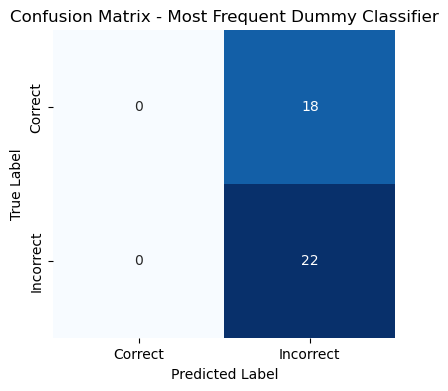

In [33]:
dummy_most_frequent = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_most_frequent.fit(X_train, y_train)
accuracy_most_frequent = dummy_most_frequent.score(X_test, y_test)
cm_most_frequent = confusion_matrix(y_test, dummy_most_frequent.predict(X_test))

# Plot confusion matrix for most frequent dummy classifier
print("Most Frequent dummy classifier accuracy:", accuracy_most_frequent)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm_most_frequent, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Correct', 'Incorrect'], yticklabels=['Correct', 'Incorrect'])
plt.title("Confusion Matrix - Most Frequent Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Stratified dummy classifier accuracy: 0.525


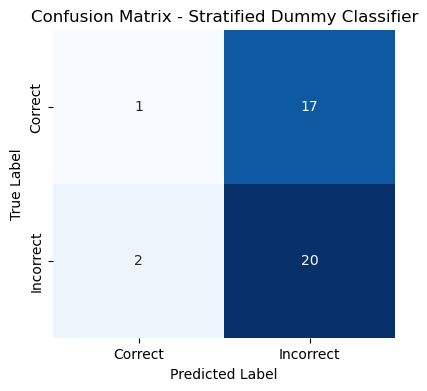

In [42]:
dummy_stratified = DummyClassifier(strategy="stratified")  
dummy_stratified.fit(X_train, y_train)
accuracy_stratified = dummy_stratified.score(X_test, y_test)
cm_stratified = confusion_matrix(y_test, dummy_stratified.predict(X_test))

# Plot confusion matrix for stratified dummy classifier
print("Stratified dummy classifier accuracy:", accuracy_stratified)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 2)
sns.heatmap(cm_stratified, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Correct', 'Incorrect'], yticklabels=['Correct', 'Incorrect'])
plt.title("Confusion Matrix - Stratified Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Uniform dummy classifier accuracy: 0.6


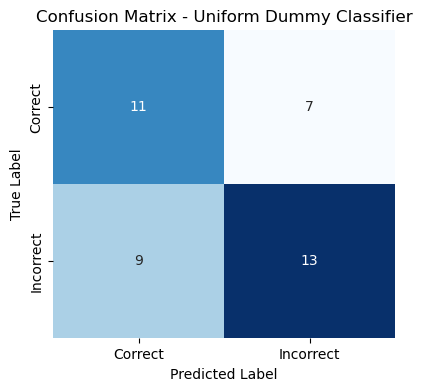

In [43]:
dummy_uniform = DummyClassifier(strategy="uniform", random_state=42)
dummy_uniform.fit(X_train, y_train)
accuracy_uniform = dummy_uniform.score(X_test, y_test)
cm_uniform = confusion_matrix(y_test, dummy_uniform.predict(X_test))

# Plot confusion matrix for uniform dummy classifier
print("Uniform dummy classifier accuracy:", accuracy_uniform)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 3)
sns.heatmap(cm_uniform, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Correct', 'Incorrect'], yticklabels=['Correct', 'Incorrect'])
plt.title("Confusion Matrix - Uniform Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()